# Telco Churn

A classification project

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

from scipy import stats


import wrangle as w
import explore as e
#import modeling as m

## Acquire

* Data acquired from the Codeup mySQL server on October 26, 2022
* It contained 7043 rows and 24 columns
* Each observation represents a Telco customer
* Each column represents a feature of those customers

In [2]:
#import unclean data from Codeup mySQL server
telco_unclean = w.get_telco_data()

### An initial look at the data

In [3]:
telco_unclean.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


## Prepare

* Checked for duplicate rows (there were none)
* Removed duplicate columns (payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id')
* Checked for nulls in the data (there were none)
* Checked that column data types were appropriate
* Noticed "total_charges" was listed as an object so researched why and found some customers have spaces (" ")
* Dropped those customers whose total_charges are spaces (these customers are new customers (tenure=0 and churn=No)), then converted to a float
* Encoded target variable, churn, as 'churn_encoded' {'Yes': 1, 'No': 0}, then dropped 'churn' column
* Split data into train, variable, and test (65/20/15)
* Outliers have not been removed for this iteration of the project

In [4]:
#clean the data to prep for exploration
telco = w.clean_telco(telco_unclean)

# splitting data into train, validate, and test
train, validate, test = w.train_validate_test_split(telco, "churn_encoded")

In [5]:
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,churn_encoded
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,One year,DSL,Mailed check,0
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,Month-to-month,DSL,Mailed check,0
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Month-to-month,Fiber optic,Electronic check,1
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Month-to-month,Fiber optic,Electronic check,1
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Month-to-month,Fiber optic,Mailed check,1


In [6]:
telco.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
senior_citizen,7032.0,NaN,NaN,NaN,0.1624,0.368844,0.0,0.0,0.0,0.0,1.0
partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
phone_service,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multiple_lines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
online_security,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
online_backup,7032,3,No,3087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device_protection,7032,3,No,3094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Explore

* Here you will explore your data then highlight 4 questions that you asked of the data and how those questions influenced your analysis
* Remember to split your data before exploring how different variables relate to one another
* Each question should be stated directly 
* Each question should be supported by a visualization
* Each question should be answered in natural language
* Two questions must be supported by a statistical test, but you may choose to support more than two
* See the following example, and read the comments in the next cell

**The following empty code block** is here to represent the countless questions, visualizations, and statistical tests 
that did not make your final report. Data scientist often create a myriad of questions, visualizations 
and statistical tests that do not make it into the final notebook. This is okay and expected. Remember 
that shotgun approaches to your data such as using pair plots to look at the relationships of each feature 
are a great way to explore your data, but they have no place in your final report. 
**Your final report is about showing and supporting your findings, not showing the work you did to get there!**

## How often do customers churn?

In [7]:
train_churn = train[train.churn_encoded == 1]
train_no_churn = train[train.churn_encoded == 0]

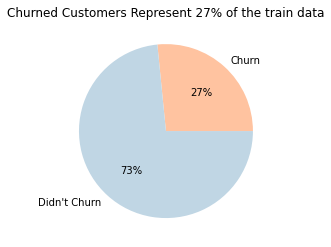

In [8]:
values = [len(train_churn.churn_encoded), len(train_no_churn.churn_encoded)] 
labels = ["Churn", "Didn't Churn"] 

# generate and show chart
plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4'])
plt.title('Churned Customers Represent 27% of the train data')
plt.show()

**A little over 1/4 of customers in the training data churn**

## Does a customer's tenure affect churn? :

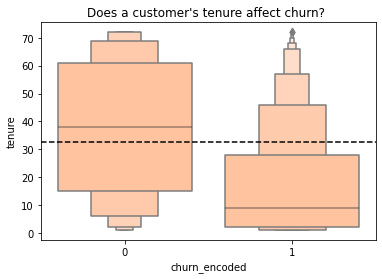

In [25]:
average = train["tenure"].mean()
sns.boxenplot(data=train, x='churn_encoded', y="tenure", color='#ffc3a0', saturation=1)
plt.title("Does a customer's tenure affect churn? ")
plt.axhline(average, ls='--', color='black') 
plt.show()

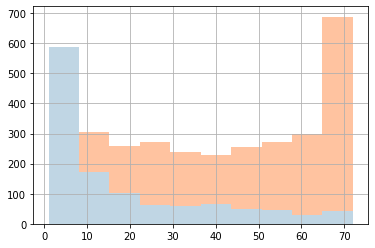

In [26]:
train_no_churn['tenure'].hist(color='#ffc3a0')
train_churn['tenure'].hist(color='#c0d6e4')
plt.show()

$H_0$ = There is no difference in tenure between those who churn and don't churn 

$H_a$ = There is a difference in tenure between those who churn and don't churn 

**Independent:** Yes. Two separate groups churn and no_churn

**Normal distribution:** Yes. Enough observations

**Equal variances:** Check $\Downarrow$

In [11]:
alpha = 0.05

In [12]:
stats.levene(train_churn.tenure, train_no_churn.tenure)

LeveneResult(statistic=279.0983604857994, pvalue=7.303234343977914e-61)

pvalue < 0.5 sooooo they are NOT equal must use equal_var = False

In [13]:
tstat, p = stats.ttest_ind(train_churn.tenure, train_no_churn.tenure, equal_var= False)

In [14]:
if (p < alpha):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')

we can reject the null hypothesis


**There is a relationship between tenure and churn.**

## Do higher monthly charges affect churn? :

TypeError: cannot unpack non-iterable AxesSubplot object

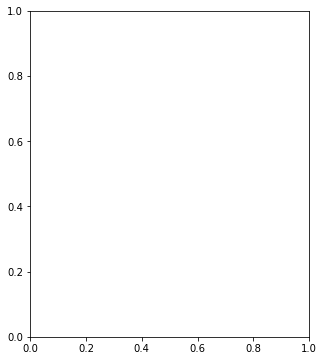

In [56]:
average = train["monthly_charges"].mean()

fig, (ax1,ax2) = plt.subplots(figsize=(5,6))
ax1.boxenplot(data=train, x='churn_encoded', y="monthly_charges", palette='pastel', saturation=1)
ax1.axhline(average, ls='--', color='black') 

fig.suptitle("Does a customer's monthly charges affect churn? ")
plt.show()

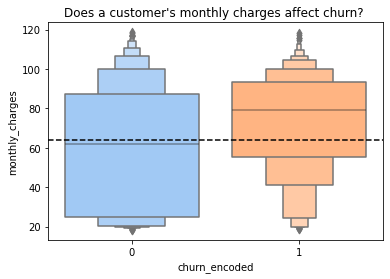

In [54]:
average = train["monthly_charges"].mean()
sns.boxenplot(data=train, x='churn_encoded', y="monthly_charges", palette='pastel', saturation=1)
plt.title("Does a customer's monthly charges affect churn? ")
plt.axhline(average, ls='--', color='black') 
plt.show()

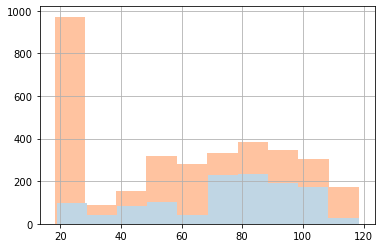

In [31]:
train_no_churn.monthly_charges.hist(color='#ffc3a0')
train_churn.monthly_charges.hist(color='#c0d6e4')
plt.show()

$H_0$ = Monthly charges of those who churn $\leq$ monthly charges of those who don't churn

$H_a$ = Monthly charges of those who churn $>$ monthly charges of those who don't churn

**Independent:** Yes. Two separate groups churn and no_churn

**Normal distribution:** Yes. Enough observations

**Equal variances:** Check $\Downarrow$

In [32]:
alpha = 0.05

In [33]:
stats.levene(train_churn.monthly_charges, train_no_churn.monthly_charges)

LeveneResult(statistic=248.35641580913386, pvalue=1.5798656854889806e-54)

pvalue < 0.5 sooooo they are NOT equal must use equal_var = False

In [34]:
tstat, p = stats.ttest_ind(train_churn.monthly_charges, train_no_churn.monthly_charges, equal_var= False)

In [35]:
if (p/2 < alpha):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')

we can reject the null hypothesis


**Those who have higher monthly charges are probably more likely to churn.**

## Does contract type affect churn?

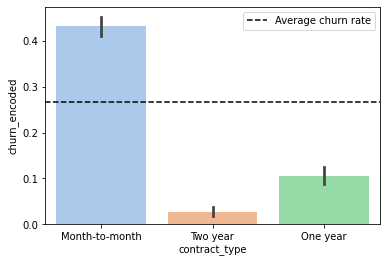

In [39]:
sns.barplot(x="contract_type", y="churn_encoded", data=train, palette='pastel')
rate = train["churn_encoded"].mean()
plt.axhline(rate, label = f'Average churn rate', linestyle='--', color='black')
plt.legend()
plt.show()

$H_0$ = Contract type is independent of churn

$H_a$ = Contract type is dependent on churn

In [40]:
alpha = 0.05

In [41]:
observed = pd.crosstab(train["contract_type"], train["churn_encoded"])
observed

churn_encoded,0,1
contract_type,,
Month-to-month,1417,1081
One year,866,103
Two year,1074,31


In [42]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [43]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1417 1081]
 [ 866  103]
 [1074   31]]
---
Expected

[[1834.16141732  663.83858268]
 [ 711.49015748  257.50984252]
 [ 811.3484252   293.6515748 ]]
---

chi^2 = 803.2392
p     = 0.0000


In [44]:
if (p < alpha):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')

we can reject the null hypothesis


**Contract type is dependent on churn**

## Do those with no tech support churn more?

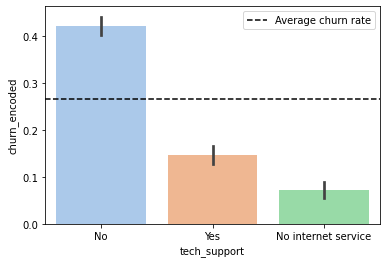

In [46]:
sns.barplot(x="tech_support", y="churn_encoded", data=train, palette='pastel')
rate = train["churn_encoded"].mean()
plt.axhline(rate, label = f'Average churn rate', linestyle='--', color='black')
plt.legend()
plt.show()

$H_0$ = There is no relationship between having tech support and churn.

$H_a$ = There is a relationship between having tech support and churn.

**Independent:** Yes. Two separate groups churn and no_churn

**Normal distribution:** Yes. Enough observations

**Equal variances:** Check $\Downarrow$

In [47]:
alpha = 0.05

In [48]:
observed = pd.crosstab(train["tech_support"], train["churn_encoded"])
observed

churn_encoded,0,1
tech_support,,
No,1310,952
No internet service,946,73
Yes,1101,190


In [49]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [50]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1310  952]
 [ 946   73]
 [1101  190]]
---
Expected

[[1660.87795276  601.12204724]
 [ 748.20275591  270.79724409]
 [ 947.91929134  343.08070866]]
---

chi^2 = 568.7273
p     = 0.0000


In [51]:
if (p < alpha):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')

we can reject the null hypothesis


**There is a relationship between having tech support and churn.**

## Exploration Summary
* After your explore section, before you start modeling, provide a summary of your findings in Explore
* Include a summary of your take-aways
* Include a summary of the features you examined and weather or not you will be going to Modeling with each feature and why
* It is important to note which features will be going into your model so the reader knows what features you are using to model on

# Modeling

### Introduction
* Explain how you will be evaluating your models
* Include the evaluation metric you will be using and why you have chosen it
* Create a baseline and briefly explain how it was calculated 

In [ ]:
# If you use code to generate your baseline run the code and generate the output here

Printout should read: <br>
Baseline: "number" "evaluation metric"

### Best 3 Models
* Show the three best model results obtained using your selected features to predict the target variable
* Typically students will show the top models they are able to generate for three different model types

## You may use this as a template for how to introduce your models:

### Model Type

In [ ]:
# Code that runs the best model in that model type goes here 
# (This may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on train: "evaluation result" <br>
"evaluation metric" on validate: "evaluation result"

### Test Model
* Choose the best model out of the three as you best model and explain why you have chosen it
* Explain that you will now run your final model on test data to gauge how it will perform on unseen data

In [ ]:
# Code that runs the best overall model on test data (this may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on Test: "evaluation result" <br>

### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

## Conclusion

### Summery
* Summarize your findings and answer the questions you brought up in explore 
* Summarize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project

**Where there is code in your report there should also be code comments telling the reader what each code block is doing. This is true for any and all code blocks even if you are using a function to import code from a module.**
<br>
<br>
**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist, your job does not end with making data discoveries. It includes effectively communicating those discoveries as well. This means documentation is a critical part of your job.**

# README

Your README should contain all of the following elements:

* **Title** Gives the name of your project
* **Project Description** Describes what your project is and why it is important 
* **Project Goal** Clearly states what your project sets out to do and how the information gained can be applied to the real world
* **Initial Hypotheses** Initial questions used to focus your project 
* **Project Plan** Guides the reader through the different stages of the pipeline as they relate to your project
* **Data Dictionary** Gives a definition for each of the features used in your report and the units they are measured in, if applicable
* **Steps to Reproduce** Gives instructions for reproducing your work. i.e. Running your notebook on someone else's computer.